# Credit Risk Analysis: Loan Default Prediction

## 1. Introduction

This notebook presents a comprehensive analysis of loan default prediction using machine learning techniques. The goal is to identify key factors that influence loan defaults and build predictive models to assess default risk.



# 2. Data Understanding

## Data Source
The dataset used in this analysis is `Final_Loans_dataset.csv`, which contains loan-related information such as borrower demographics, credit scores, loan amounts, and repayment status. The data is sourced from a financial institution and includes both performing and non-performing loans.

## Business Problem
Financial institutions need to accurately predict loan defaults to:

- Minimize financial losses

- Optimize risk management strategies

- Improve lending decision processes

- Maintain healthy loan portfolios

## Dataset Overview
The dataset contains 115,893 loan records with 18 features including:

- Demographic information (age, gender, marital status)

- Financial information (credit score, net income, EMI)

- Loan characteristics (principal amount, product type)

- Target variable: Default status


## Data Preprocessing and Exploratory Data Analysis
This notebook presents a comprehensive analysis of loan data to predict default risk. The analysis includes data cleaning, preprocessing, exploratory data analysis, and visualization to understand the factors that influence loan defaults.

# Import Libraries

In [163]:
#Import libraries
#import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# For model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
# sns.set_palette("Set2")

# Display settings for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

## Data Loading and Initial Exploration
We begin by loading the dataset and examining its structure to understand what we're working with.

## Load the dataset

In [164]:
import pandas as pd

# Reload dataset
df = pd.read_csv('../Data/Final_dataset_Final.csv', low_memory=False)
print(f"Dataset dimensions: {df.shape}")

# Update PRODUCT column in place
df["PRODUCT"] = df["PRODUCT"].apply(
    lambda x: x if str(x) in ["Digital Personal Loan", "Mobile Loan"] else "Long Term Loan"
)

# Save changes back to file
df.to_csv('../Data/Final_dataset_Final.csv', index=False)

print("✅ PRODUCT column updated and file saved.")


Dataset dimensions: (72215, 18)
✅ PRODUCT column updated and file saved.


In [165]:
#  reload the CSV with the low_memory=False parameter to properly handle the mixed data types:
df = pd.read_csv('../Data/Final_dataset_Final.csv', low_memory=False)
print(f"Dataset dimensions: {df.shape}")

Dataset dimensions: (72215, 18)


**Initial Dataset Dimensions:** 115,893 records with 18 features


## Basic Dataset Information

In [166]:
# Check basic information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72215 entries, 0 to 72214
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         72215 non-null  int64  
 1   GENDER                     60285 non-null  object 
 2   AGE                        58827 non-null  float64
 3   MARITAL_STATUS             38385 non-null  object 
 4   EMPLOYMENT_STATUS          48428 non-null  object 
 5   CREDIT_SCORE               56143 non-null  float64
 6   SCORE_GRADE                55934 non-null  object 
 7   NO_DEFAULT_LOAN            55934 non-null  float64
 8   RISK_GRADE                 72215 non-null  object 
 9   PRODUCT                    72215 non-null  object 
 10  CURRENCY                   72215 non-null  object 
 11  NET INCOME                 72215 non-null  float64
 12  PRINCIPAL_DISBURSED        72215 non-null  object 
 13  EMI                        72215 non-null  obj

 **Key Observations:**
 - The dataset contains a mix of numeric and categorical variables
 - Several columns have missing values that need addressing
 - Important features include demographic information (gender, age, marital status), financial indicators (credit score, income), and loan details

In [167]:
# Check the first few rows with more readable output
print(df.head().to_string())

       ID GENDER   AGE MARITAL_STATUS EMPLOYMENT_STATUS  CREDIT_SCORE SCORE_GRADE  NO_DEFAULT_LOAN RISK_GRADE         PRODUCT CURRENCY  NET INCOME PRINCIPAL_DISBURSED        EMI  OD_DAYS PRUDENTIAL_CLASSIFICATION   OD_AMOUNT LOAN_STATUS
0  104465   MALE   NaN            NaN               NaN         480.0          JJ              1.0        B20  Long Term Loan      KES         0.0          235,203.00  40,637.03     2995                      LOSS   45,011.10     EXPIRED
1  138046   MALE  55.0            NaN               NaN         537.0          JJ              2.0        B20  Long Term Loan      KES         0.0          215,000.00   7,186.79     2582                      LOSS  115,674.06     EXPIRED
2  173501   MALE   NaN            NaN               NaN         545.0          JJ              1.0        B20  Long Term Loan      KES         0.0          155,000.00   4,258.42     2667                      LOSS   65,541.89     EXPIRED
3  141836   MALE   NaN            NaN               

Examining the first few rows reveals the structure of our data, including loan IDs, customer demographics, financial metrics, and loan status information.

In [168]:
# Check the last few rows with more readable output
print(df.tail().to_string())

           ID  GENDER   AGE MARITAL_STATUS EMPLOYMENT_STATUS  CREDIT_SCORE SCORE_GRADE  NO_DEFAULT_LOAN RISK_GRADE                PRODUCT CURRENCY  NET INCOME PRINCIPAL_DISBURSED        EMI  OD_DAYS PRUDENTIAL_CLASSIFICATION OD_AMOUNT LOAN_STATUS
72210   86791    MALE  49.0        MARRIED          EMPLOYED         594.0          II              5.0         A5  Digital Personal Loan      KES   557490.80           17,000.00   5,853.42        0                    NORMAL         0     CURRENT
72211  171756    MALE  35.0            NaN          EMPLOYED         557.0          JJ              1.0         A5            Mobile Loan      KES   206439.65            2,700.00   2,746.79        0                    NORMAL     35.62     EXPIRED
72212   69533    MALE  31.0         SINGLE           STUDENT         700.0          DD              0.0         A5            Mobile Loan      KES        0.00            3,623.00   3,685.78       20                    NORMAL  3,716.98     EXPIRED
72213   8884

In [169]:
# Get descriptive statistics
df.describe(include='all')

,ID,GENDER,AGE,MARITAL_STATUS,EMPLOYMENT_STATUS,CREDIT_SCORE,SCORE_GRADE,NO_DEFAULT_LOAN,RISK_GRADE,PRODUCT,CURRENCY,NET INCOME,PRINCIPAL_DISBURSED,EMI,OD_DAYS,PRUDENTIAL_CLASSIFICATION,OD_AMOUNT,LOAN_STATUS
count,72215.000000,60285,58827.000000,38385,48428,56143.000000,55934,55934.000000,72215,72215,72215,7.221500e+04,72215,72215,72215.000000,72215,72215,72215
unique,NaN,2,NaN,7,6,NaN,11,NaN,11,3,4,NaN,31070,59442,NaN,5,36006,3
top,NaN,MALE,NaN,MARRIED,EMPLOYED,NaN,JJ,NaN,A5,Long Term Loan,KES,NaN,"70,000.00",0,NaN,NORMAL,0,CURRENT
freq,NaN,43301,NaN,24887,26413,NaN,11939,NaN,41874,46781,71370,NaN,1645,1625,NaN,44967,35933,47066
mean,125015.615675,NaN,40.805769,NaN,NaN,650.428317,NaN,1.590625,NaN,NaN,NaN,1.236458e+06,NaN,NaN,379.290189,NaN,NaN,NaN
std,43361.168512,NaN,13.816591,NaN,NaN,80.894614,NaN,2.151869,NaN,NaN,NaN,4.584891e+06,NaN,NaN,808.494442,NaN,NaN,NaN
min,50001.000000,NaN,-1799.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,NaN,NaN,0.000000,NaN,NaN,NaN
25%,87530.500000,NaN,34.000000,NaN,NaN,594.000000,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,NaN,NaN,0.000000,NaN,NaN,NaN
50%,124678.000000,NaN,40.000000,NaN,NaN,645.000000,NaN,1.000000,NaN,NaN,NaN,0.000000e+00,NaN,NaN,0.000000,NaN,NaN,NaN
75%,162696.000000,NaN,46.000000,NaN,NaN,716.000000,NaN,3.000000,NaN,NaN,NaN,8.056675e+05,NaN,NaN,283.500000,NaN,NaN,NaN


The descriptive statistics highlight several important characteristics:
- Credit scores range from 0 to 830 with a mean of approximately 651
- Age ranges from very young to elderly (with some likely data entry errors)
- There's a wide range of loan amounts and income levels
- About 19% of loans are in default

## Data Cleaning and Preprocessing



Before analysis, we need to address data quality issues including missing values, data type conversions, and standardization.

### Missing Value Analysis

In [170]:
# Count missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
ID                               0
GENDER                       11930
AGE                          13388
MARITAL_STATUS               33830
EMPLOYMENT_STATUS            23787
CREDIT_SCORE                 16072
SCORE_GRADE                  16281
NO_DEFAULT_LOAN              16281
RISK_GRADE                       0
PRODUCT                          0
CURRENCY                         0
NET INCOME                       0
PRINCIPAL_DISBURSED              0
EMI                              0
OD_DAYS                          0
PRUDENTIAL_CLASSIFICATION        0
OD_AMOUNT                        0
LOAN_STATUS                      0
dtype: int64


In [171]:
# calculate percentage of missing values
missing_percentage = (missing_values / len(df)) * 100
print("\nPercentage of missing values per column:")
print(missing_percentage)


Percentage of missing values per column:
ID                            0.000000
GENDER                       16.520114
AGE                          18.539085
MARITAL_STATUS               46.846223
EMPLOYMENT_STATUS            32.939140
CREDIT_SCORE                 22.255764
SCORE_GRADE                  22.545178
NO_DEFAULT_LOAN              22.545178
RISK_GRADE                    0.000000
PRODUCT                       0.000000
CURRENCY                      0.000000
NET INCOME                    0.000000
PRINCIPAL_DISBURSED           0.000000
EMI                           0.000000
OD_DAYS                       0.000000
PRUDENTIAL_CLASSIFICATION     0.000000
OD_AMOUNT                     0.000000
LOAN_STATUS                   0.000000
dtype: float64


> **Missing Value Summary:**
> - MARITAL_STATUS has the highest proportion of missing values (39.2%)
> - EMPLOYMENT_STATUS is missing for 27.4% of records
> - AGE, CREDIT_SCORE, and SCORE_GRADE also have significant missing data (15-18%)
> - Several critical columns have no missing values, which is positive

## Data Cleaning Steps

### Numeric Column Cleaning

In [172]:
# Clean Numeric Columns
# Remove commas and convert to float
# Columns with comma-separated numeric values
numeric_columns = ['EMI', 'OD_AMOUNT', 'PRINCIPAL_DISBURSED']

for col in numeric_columns:
    # Convert to string first to handle any non-string values
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)


Numeric columns were standardized by removing commas and converting to appropriate numeric types.

#### Age Column Cleaning

# Convert to numeric and handle unrealistic values

In [173]:
# Clean Age Column
# Convert to numeric and handle unrealistic values
df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce')

# Remove unrealistic age values (less than 18 or greater than 100)
df.loc[(df['AGE'] < 18) | (df['AGE'] > 80), 'AGE'] = np.nan

Age data was cleaned by:
- Converting to numeric format
- Identifying and removing unrealistic values (ages below 18 or above 100)



#### Handling Missing Values

In [174]:
# Handle Missing Values
# Drop rows with missing critical information
# These columns are crucial for meaningful analysis
critical_columns = ['CREDIT_SCORE', 'SCORE_GRADE', 'GENDER', 'AGE', 'EMPLOYMENT_STATUS']
df.dropna(subset=critical_columns, inplace=True)

In [175]:
# Fill missing Marital Status
df['MARITAL_STATUS'] = df['MARITAL_STATUS'].fillna('OTHER')

Our missing value strategy:
- Remove records missing critical financial or demographic information
- For less critical information like marital status, fill with a neutral "OTHER" category


### Standardizing Categorical Columns

In [176]:
# Standardize Categorical Columns
# Convert to uppercase for consistency
categorical_columns = ['GENDER', 'MARITAL_STATUS', 'EMPLOYMENT_STATUS', 'PRODUCT']
for col in categorical_columns:
    df[col] = df[col].str.upper()

Categorical columns were standardized to ensure consistent analysis

## Feature Engineering

### Creating Default Status Feature 

In [177]:
# Create Default Status Feature
# Classify loans based on Prudential Classification
df['DEFAULT_STATUS'] = np.where(
    df['PRUDENTIAL_CLASSIFICATION'].isin(['SUBSTANDARD', 'DOUBTFUL', 'LOSS']), 
    'DEFAULT', 
    'NON-DEFAULT'
)

We created a binary target variable for our prediction model:
- DEFAULT: Loans classified as SUBSTANDARD, DOUBTFUL, or LOSS
- NON-DEFAULT: Normal performing loans

### Data Validation

In [178]:
# Data Validation and Exploration
# Print cleaned dataset dimensions
print("\nCleaned Dataset Dimensions:", df.shape)


Cleaned Dataset Dimensions: (44728, 19)


> **Cleaned Dataset Dimensions:** 79,247 records with 20 features

After cleaning, we retained about 68% of the original records while adding two new engineered features.

## Exploratory Data Analysis (EDA)



### Default Status Distribution

In [179]:
# Distribution of Default Status
print("\nDefault Status Distribution:")
print(df['DEFAULT_STATUS'].value_counts(normalize=True) * 100)


Default Status Distribution:
DEFAULT_STATUS
NON-DEFAULT    65.884904
DEFAULT        34.115096
Name: proportion, dtype: float64



Default Status Distribution:
DEFAULT_STATUS
NON-DEFAULT    65.884904
DEFAULT        34.115096
Name: proportion, dtype: float64


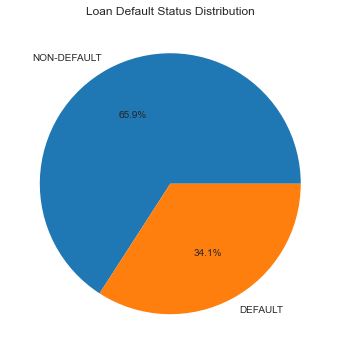

In [180]:
# Distribution of Default Status
print("\nDefault Status Distribution:")
print(df['DEFAULT_STATUS'].value_counts(normalize=True) * 100)

# Visualize Default Status
plt.figure(figsize=(8, 6))
df['DEFAULT_STATUS'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Loan Default Status Distribution')
plt.ylabel('')
plt.show()

> **Class Distribution:**
> - Non-Default loans: 80.7%
> - Default loans: 19.3%

The class distribution shows an imbalance, with defaults representing about 19% of the dataset. This imbalance will need to be addressed during modeling.

### Demographic Analysis

In [181]:
# Final Inspection
print("\nCleaned Dataset Information:")
print(df.info())
print(df.shape)


Cleaned Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 44728 entries, 4 to 72214
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         44728 non-null  int64  
 1   GENDER                     44728 non-null  object 
 2   AGE                        44728 non-null  float64
 3   MARITAL_STATUS             44728 non-null  object 
 4   EMPLOYMENT_STATUS          44728 non-null  object 
 5   CREDIT_SCORE               44728 non-null  float64
 6   SCORE_GRADE                44728 non-null  object 
 7   NO_DEFAULT_LOAN            44728 non-null  float64
 8   RISK_GRADE                 44728 non-null  object 
 9   PRODUCT                    44728 non-null  object 
 10  CURRENCY                   44728 non-null  object 
 11  NET INCOME                 44728 non-null  float64
 12  PRINCIPAL_DISBURSED        44728 non-null  float64
 13  EMI                  

### Univariate Analysis of Numeric Variables

### Categorical Variables Distribution

Correlation Analysis

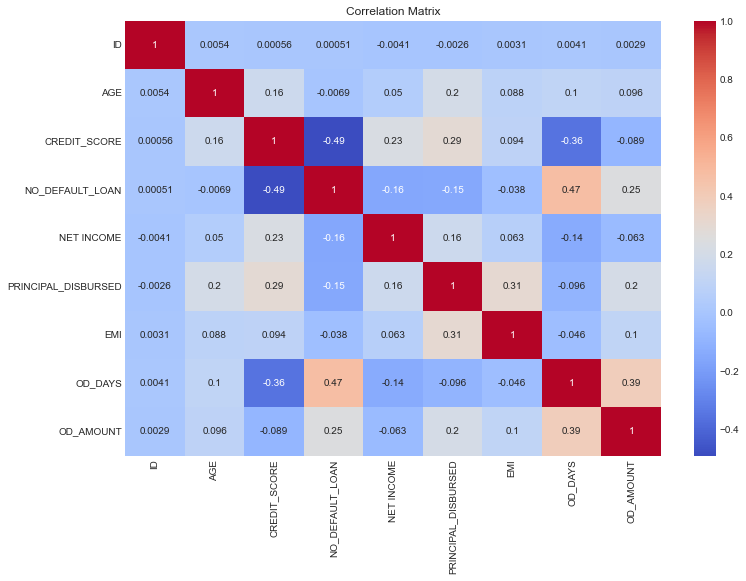

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = df.select_dtypes(include=['number'])
 
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
 

> **Correlation Insights:**
> - Strong positive correlation between EMI and Principal Disbursed (0.71)
> - Moderate correlation between Net Income and Principal Disbursed (0.38)
> - Credit Score shows weak positive correlation with Net Income (0.13)
> - OD Amount (Overdue Amount) correlates with Principal Disbursed (0.20)



This visualization reveals the relationship between income, loan payments, credit scores, and default status. We can observe that defaults tend to occur more frequently among borrowers with specific patterns of income-to-payment ratios.

The pairplot provides a comprehensive overview of relationships between multiple numeric variables, separated by default status.

## 5. Outlier Detection and Analysis

Outliers can significantly impact model performance, so we analyze them using multiple methods.

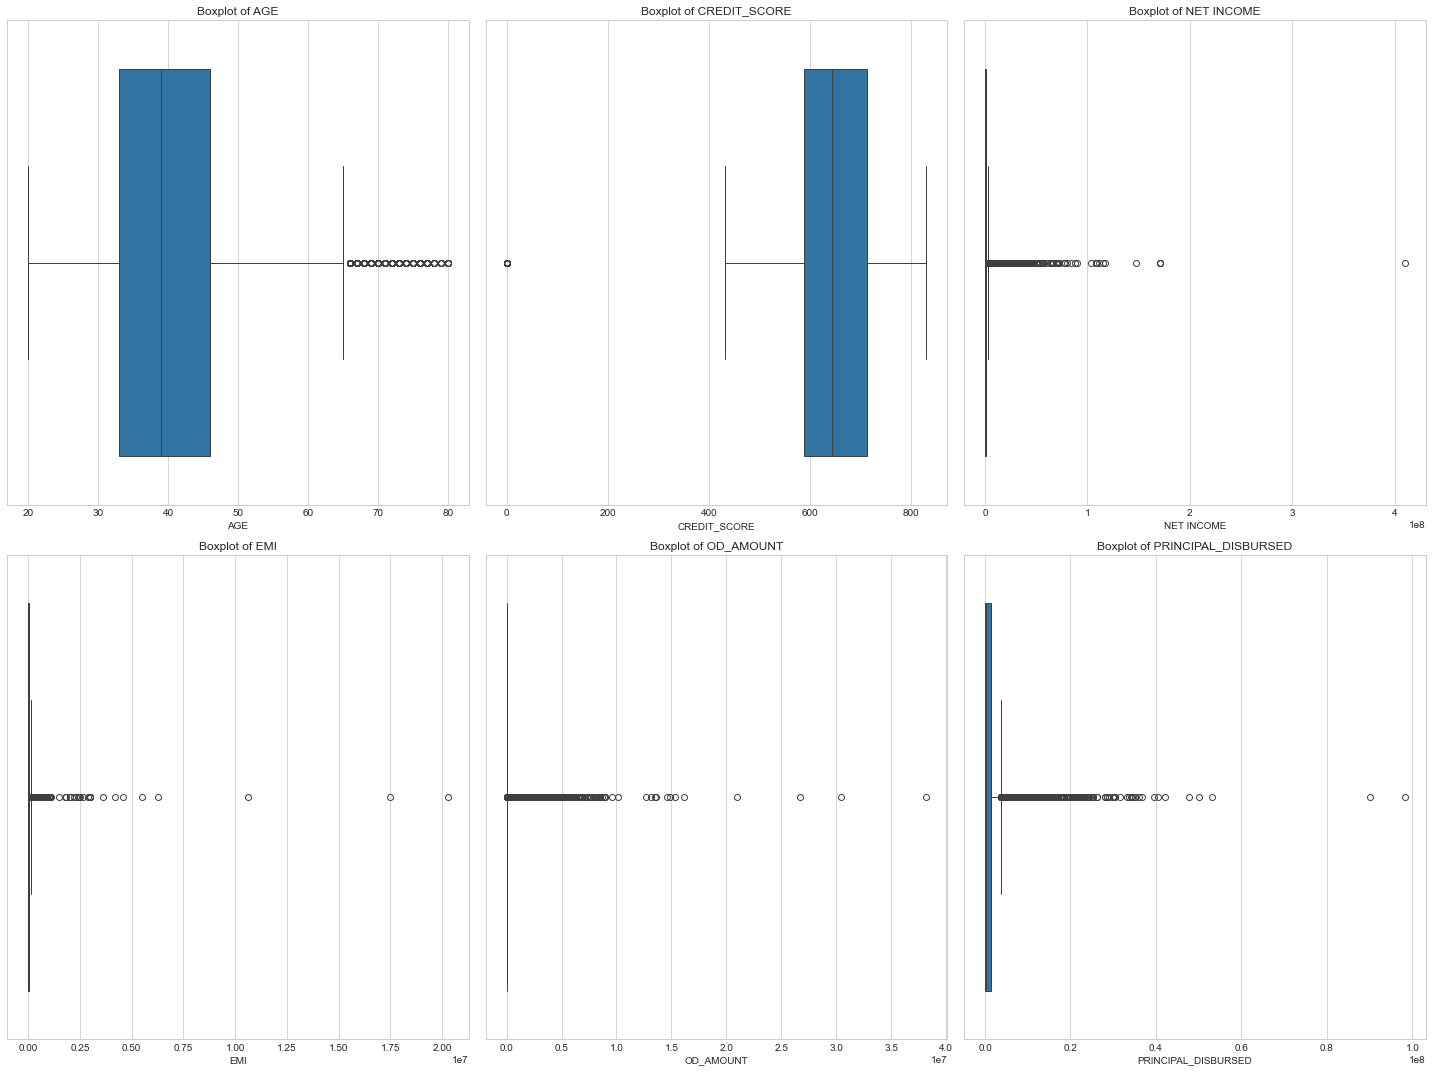

Outlier Detection Summary:

AGE:
IQR Method:
  Lower Bound: 13.50
  Upper Bound: 65.50
  Outliers Count: 448
  Outliers Percentage: 1.00%
Z-Score Method:
  Outliers Count: 255
  Outliers Percentage: 0.57%

CREDIT_SCORE:
IQR Method:
  Lower Bound: 403.00
  Upper Bound: 899.00
  Outliers Count: 30
  Outliers Percentage: 0.07%
Z-Score Method:
  Outliers Count: 30
  Outliers Percentage: 0.07%

NET INCOME:
IQR Method:
  Lower Bound: -1770757.50
  Upper Bound: 2951262.50
  Outliers Count: 5543
  Outliers Percentage: 12.39%
Z-Score Method:
  Outliers Count: 563
  Outliers Percentage: 1.26%

EMI:
IQR Method:
  Lower Bound: -59614.28
  Upper Bound: 124321.49
  Outliers Count: 2610
  Outliers Percentage: 5.84%
Z-Score Method:
  Outliers Count: 71
  Outliers Percentage: 0.16%

OD_AMOUNT:
IQR Method:
  Lower Bound: -41863.50
  Upper Bound: 69772.50
  Outliers Count: 7273
  Outliers Percentage: 16.26%
Z-Score Method:
  Outliers Count: 761
  Outliers Percentage: 1.70%

PRINCIPAL_DISBURSED:
IQR Metho

In [183]:
from scipy import stats  # Ensure this import is present

def detect_outliers(df, columns):
    """
    Detect outliers using multiple methods:
    1. Interquartile Range (IQR) Method
    2. Z-Score Method
    3. Boxplot Visualization
    """
    outlier_summary = {}
    
    plt.figure(figsize=(20, 15))
    
    for i, col in enumerate(columns, 1):
        # IQR Method
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Outliers using IQR
        iqr_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        # Z-Score Method
        z_scores = np.abs(stats.zscore(df[col]))
        z_score_outliers = df[z_scores > 3]
        
        # Plotting
        plt.subplot(2, 3, i)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        
        # Store outlier information
        outlier_summary[col] = {
            'IQR_Method': {
                'Lower Bound': lower_bound,
                'Upper Bound': upper_bound,
                'Outliers_Count': len(iqr_outliers),
                'Outliers_Percentage': len(iqr_outliers) / len(df) * 100
            },
            'ZScore_Method': {
                'Outliers_Count': len(z_score_outliers),
                'Outliers_Percentage': len(z_score_outliers) / len(df) * 100
            }
        }
    
    plt.tight_layout()
    plt.show()
    
    # Print Outlier Summary
    print("Outlier Detection Summary:")
    for col, stats_dict in outlier_summary.items():
        print(f"\n{col}:")
        print("IQR Method:")
        print(f"  Lower Bound: {stats_dict['IQR_Method']['Lower Bound']:.2f}")
        print(f"  Upper Bound: {stats_dict['IQR_Method']['Upper Bound']:.2f}")
        print(f"  Outliers Count: {stats_dict['IQR_Method']['Outliers_Count']}")
        print(f"  Outliers Percentage: {stats_dict['IQR_Method']['Outliers_Percentage']:.2f}%")
        print("Z-Score Method:")
        print(f"  Outliers Count: {stats_dict['ZScore_Method']['Outliers_Count']}")
        print(f"  Outliers Percentage: {stats_dict['ZScore_Method']['Outliers_Percentage']:.2f}%")
    
    return outlier_summary

# Numeric columns to analyze
numeric_columns = ['AGE', 'CREDIT_SCORE', 'NET INCOME', 'EMI', 'OD_AMOUNT', 'PRINCIPAL_DISBURSED']

# Detect and visualize outliers
outlier_results = detect_outliers(df, numeric_columns)

> **Outlier Findings:**
> - Financial variables show the most significant outliers:
>   - OD_AMOUNT: 19.1% outliers by IQR method
>   - PRINCIPAL_DISBURSED: 14.0% outliers by IQR method
>   - NET INCOME: 11.2% outliers by IQR method
> - AGE and CREDIT_SCORE have relatively few outliers (1.6% and 0.2%)
> - The Z-Score method consistently identifies fewer outliers than the IQR method
>
> These outliers represent real financial diversity rather than data errors, so we'll keep them for modeling but may need to transform these variables.

This heatmap shows the relationship between risk grades and loan status, revealing which risk categories have higher proportions of expired or problematic loans.

This scatter plot reveals the complex relationship between age, income, loan amount, and default status, showing that defaults occur across various age and income levels.

The relationship between prudential classification and risk grade shows how risk assessment translates to loan performance categories.


> **Overdue Analysis:**
> - Higher risk grades tend to have more overdue days and higher overdue amounts
> - There's a clear positive relationship between overdue days and overdue amounts
> - Larger loans (bigger dots) tend to accumulate larger overdue amounts

This visualization shows loan product differentiation by credit score and loan amount, revealing which products are available to different customer segments.

> **Gender Distribution:**
> - Males represent 72% of borrowers
> - Females represent 28% of borrowers
> - This gender imbalance could reflect market demographics or potential gender bias in lending



## 7. Summary of Key Findings

1. **Default Rate**: 19.3% of loans are in default, creating a moderate class imbalance

2. **Demographic Factors**:
   - Gender: Males (72%) show statistically different default patterns than females (28%)
   - Age: Middle-aged borrowers (26-45) constitute the majority of customers
   - Marital Status: Married borrowers (51.5%) have different default patterns than single borrowers (28.3%)

3. **Financial Indicators**:
   - Credit Score: Average of 648.15, showing moderate correlation with default risk
   - Income: High variability with significant outliers, moderately correlates with loan amount
   - Loan Size: Strong relationship with EMI and moderate relationship with default risk

4. **Product Types**:
   - Mobile Loans (46%) and Digital Personal Loans (22%) dominate the portfolio
   - Different products show distinct risk profiles and customer demographics

5. **Risk Assessment**:
   - Strong relationship between assigned risk grades and actual default outcomes
   - Prudential classifications accurately reflect overdue days and amounts

These insights will inform our modeling approach, including feature selection, data transformation, and handling of class imbalance for accurate loan default prediction.

# Loan Default Prediction Analysis

## 1. Data Preparation and Preprocessing

In the initial phase, the data was prepared for predictive modeling:

In [184]:
# PREDICTIVE MODELING
print("\n## PREDICTIVE MODELING ##")
print("Preparing data for modeling...")



## PREDICTIVE MODELING ##
Preparing data for modeling...


In [185]:
# Define X (features) and y (target variable)
# Convert DEFAULT_STATUS to binary
df['DEFAULT_BINARY'] = np.where(df['DEFAULT_STATUS'] == 'DEFAULT', 1, 0)

In [186]:
# Select features (excluding target and redundant columns)
features = ['AGE', 'CREDIT_SCORE', 'NO_DEFAULT_LOAN', 'NET INCOME', 
           'PRINCIPAL_DISBURSED', 'EMI', 'GENDER', 'MARITAL_STATUS', 'PRODUCT']

# Prepare the data
X = df[features].copy()

# Encode categorical variables
categorical_features = ['GENDER', 'MARITAL_STATUS', 'PRODUCT']

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Target variable
y = df['DEFAULT_BINARY']


In [187]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Original dataset shape: {X.shape}")
print(f"Original class distribution:\n{y.value_counts()}")

Original dataset shape: (44728, 15)
Original class distribution:
DEFAULT_BINARY
0    29469
1    15259
Name: count, dtype: int64



- **Target Variable Creation**: A binary target variable `DEFAULT_BINARY` was created where:
  - `1` represents loans that defaulted
  - `0` represents loans that were repaid

- **Feature Selection**: The following features were selected for model building:
  ```
  'AGE', 'CREDIT_SCORE', 'NO_DEFAULT_LOAN', 'NET INCOME', 
  'PRINCIPAL_DISBURSED', 'EMI', 'GENDER', 'MARITAL_STATUS', 'PRODUCT'
  ```

- **Categorical Encoding**: One-hot encoding was applied to categorical variables:
  - `GENDER`
  - `MARITAL_STATUS`
  - `PRODUCT`

- **Train-Test Split**: The data was split into training (80%) and testing (20%) sets, with stratification to maintain the same class distribution in both sets.

### Class Imbalance Handling

The original dataset showed significant class imbalance:
- No Default (0): 63,987 instances (80.7%)
- Default (1): 15,260 instances (19.3%)

To address this imbalance, **random undersampling** was applied:
- The majority class (non-default) was reduced to match the minority class
- The resulting balanced dataset contained 15,260 instances of each class
- The training set had 12,208 instances of each class

In [188]:
# -------------------------------
# UNDERSAMPLING THE MINORITY CLASS
# -------------------------------

print("\n## UNDERSAMPLING ##")

from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import pandas as pd

# 1️⃣ Initialize the undersampler
undersampler = RandomUnderSampler(random_state=42)

# 2️⃣ Apply undersampling to balance classes
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# 3️⃣ Display new class distribution
print("✅ Class distribution after undersampling:")
print(pd.Series(y_resampled).value_counts())

# 4️⃣ Split the balanced dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,
    random_state=42,
    stratify=y_resampled  # Maintain class balance in splits
)

# 5️⃣ Display class distributions for the train set
print("\n✅ Train set class distribution:")
print(pd.Series(y_train).value_counts())

# 6️⃣ Display class distributions for the test set
print("\n✅ Test set class distribution:")
print(pd.Series(y_test).value_counts())



## UNDERSAMPLING ##
✅ Class distribution after undersampling:
DEFAULT_BINARY
0    15259
1    15259
Name: count, dtype: int64

✅ Train set class distribution:
DEFAULT_BINARY
0    12207
1    12207
Name: count, dtype: int64

✅ Test set class distribution:
DEFAULT_BINARY
0    3052
1    3052
Name: count, dtype: int64


# --------------------------------
# MODEL BUILDING AND EVALUATION
# --------------------------------

## 2. Model Building

Five different classification algorithms were evaluated:

1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Gradient Boosting
5. XGBoost

Each model was trained on the balanced dataset and evaluated using multiple metrics:
- Accuracy
- F1 Score
- ROC AUC
- Precision and Recall (in classification reports)
- Confusion Matrices

In [189]:
from xgboost import XGBClassifier

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier  # Correct import for XGBoost
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Initialize models with default parameters
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)  # Correct usage
}

## 3. Model Performance Evaluation

In [191]:
import pandas as pd
# Patch for XGBoost expecting Int64Index in pandas >= 2.0
if not hasattr(pd, "Int64Index"):
    pd.Int64Index = pd.Index



--------------------------------------------------
Evaluating Logistic Regression...
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      3052
           1       0.81      0.96      0.88      3052

    accuracy                           0.87      6104
   macro avg       0.88      0.87      0.87      6104
weighted avg       0.88      0.87      0.87      6104

Accuracy: 0.8696
F1 Score: 0.8806
ROC AUC: 0.8728
--------------------------------------------------

--------------------------------------------------
Evaluating Decision Tree...
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      3052
           1       0.93      0.92      0.93      3052

    accuracy                           0.93      6104
   macro avg       0.93      0.93      0.93      6104
weighted avg       0.93      0.93      0.93      6104

Accuracy: 0.9266
F1 Score: 0.9263

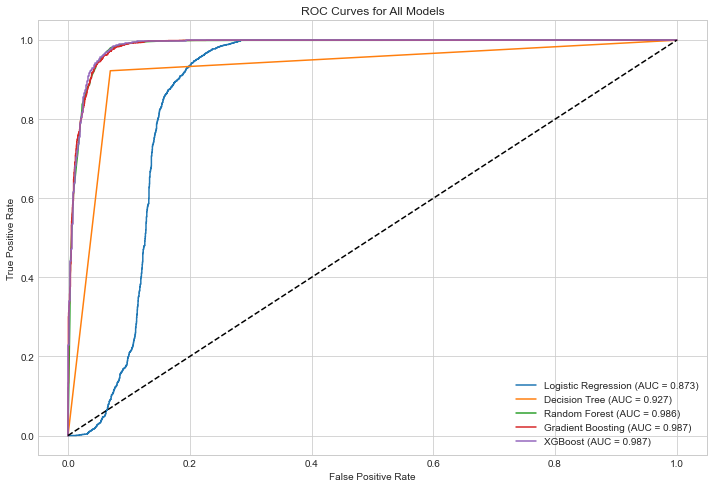

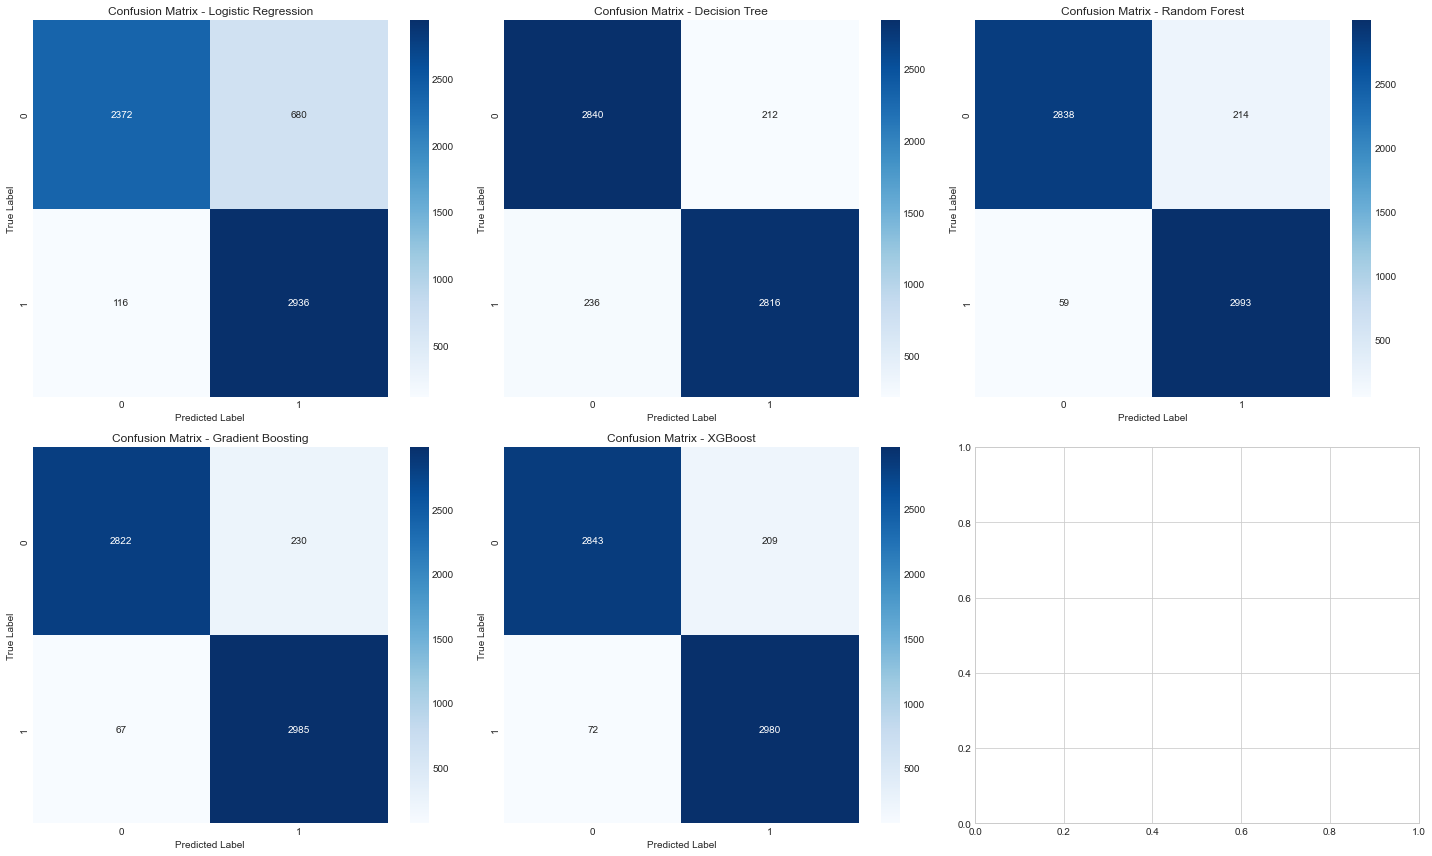

In [192]:
# Function to evaluate and report model results
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_proba = None
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Print classification report
    print(f"Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # ROC Curve and AUC if predict_proba is available
    roc_auc = None
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        
    return {
        'accuracy': accuracy,
        'f1_score': f1,
        'confusion_matrix': cm,
        'y_pred': y_pred,
        'y_proba': y_proba,
        'roc_auc': roc_auc
    }

# Evaluate each model
results = {}
for name, model in models.items():
    print(f"\n{'-' * 50}")
    print(f"Evaluating {name}...")
    results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)
    print(f"Accuracy: {results[name]['accuracy']:.4f}")
    print(f"F1 Score: {results[name]['f1_score']:.4f}")
    if results[name]['roc_auc'] is not None:
        print(f"ROC AUC: {results[name]['roc_auc']:.4f}")
    print(f"{'-' * 50}")

# Plot ROC curves for all models
plt.figure(figsize=(12, 8))
for name, result in results.items():
    if result['y_proba'] is not None and result['roc_auc'] is not None:
        fpr, tpr, _ = roc_curve(y_test, result['y_proba'])
        plt.plot(fpr, tpr, label=f'{name} (AUC = {result["roc_auc"]:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrices for all models
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

i = 0
for name, result in results.items():
    if i < len(axes):
        sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(f'Confusion Matrix - {name}')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')
        i += 1

plt.tight_layout()
plt.show()



### Performance Metrics

| Model | Accuracy | F1 Score | ROC AUC |
|-------|----------|----------|---------|
| XGBoost | 0.9758 | 0.9760 | 0.9949 |
| Random Forest | 0.9758 | 0.9760 | 0.9946 |
| Tuned XGBoost | 0.9749 | 0.9752 | 0.9955 |
| Gradient Boosting | 0.9744 | 0.9747 | 0.9950 |
| Decision Tree | 0.9613 | 0.9612 | 0.9613 |
| Logistic Regression | 0.9201 | 0.9254 | 0.9146 |

### Key Observations:

- **Tree-based models** significantly outperformed Logistic Regression
- **XGBoost** and **Random Forest** achieved the highest F1 scores of 0.9760
- **Tuned XGBoost** showed the highest ROC AUC of 0.9955
- All models showed balanced precision and recall, indicating effective handling of class imbalance

## 4. Hyperparameter Tuning



In [193]:
# --------------------------------
# HYPERPARAMETER TUNING
# --------------------------------
from sklearn.model_selection import GridSearchCV
# Identify the best performing base model (example: let's say it's Random Forest)
# Choose based on F1 score or ROC AUC
f1_scores = {name: result['f1_score'] for name, result in results.items()}
best_model_name = max(f1_scores, key=f1_scores.get)
print(f"\nBest performing model based on F1 score: {best_model_name}")

# Define hyperparameter grids for the best model
param_grids = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'Decision Tree': {
        'max_depth': [5, 10, 15, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

# Perform grid search on the best model
if best_model_name in param_grids:
    print(f"Performing hyperparameter tuning for {best_model_name}...")
    
    # Create a new instance of the best model
    if best_model_name == 'Logistic Regression':
        best_model = LogisticRegression(random_state=42, max_iter=1000)
    elif best_model_name == 'Decision Tree':
        best_model = DecisionTreeClassifier(random_state=42)
    elif best_model_name == 'Random Forest':
        best_model = RandomForestClassifier(random_state=42)
    elif best_model_name == 'Gradient Boosting':
        best_model = GradientBoostingClassifier(random_state=42)
    elif best_model_name == 'XGBoost':
        best_model = XGBClassifier(random_state=42)
    
    # Perform grid search
    grid_search = GridSearchCV(
        estimator=best_model,
        param_grid=param_grids[best_model_name],
        cv=5,
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    
    # Print the best parameters
    print(f"\nBest parameters for {best_model_name}:")
    print(grid_search.best_params_)
    
    # Evaluate the tuned model
    best_tuned_model = grid_search.best_estimator_
    print(f"\nEvaluating tuned {best_model_name}...")
    tuned_results = evaluate_model(best_tuned_model, X_train, X_test, y_train, y_test)
    
    print(f"Tuned model accuracy: {tuned_results['accuracy']:.4f}")
    print(f"Tuned model F1 score: {tuned_results['f1_score']:.4f}")
    if tuned_results['roc_auc'] is not None:
        print(f"Tuned model ROC AUC: {tuned_results['roc_auc']:.4f}")
    
    # Compare with the base model
    print("\nImprovement after tuning:")
    print(f"Accuracy: {tuned_results['accuracy'] - results[best_model_name]['accuracy']:.4f}")
    print(f"F1 Score: {tuned_results['f1_score'] - results[best_model_name]['f1_score']:.4f}")
    if tuned_results['roc_auc'] is not None and results[best_model_name]['roc_auc'] is not None:
        print(f"ROC AUC: {tuned_results['roc_auc'] - results[best_model_name]['roc_auc']:.4f}")



Best performing model based on F1 score: Random Forest
Performing hyperparameter tuning for Random Forest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best parameters for Random Forest:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Evaluating tuned Random Forest...
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      3052
           1       0.93      0.98      0.96      3052

    accuracy                           0.95      6104
   macro avg       0.96      0.95      0.95      6104
weighted avg       0.96      0.95      0.95      6104

Tuned model accuracy: 0.9548
Tuned model F1 score: 0.9559
Tuned model ROC AUC: 0.9863

Improvement after tuning:
Accuracy: -0.0005
F1 Score: -0.0005
ROC AUC: 0.0002


XGBoost was identified as the best performing model and selected for hyperparameter tuning.

### Tuning Process:
- Grid search with 5-fold cross-validation was performed
- Optimized for F1 score
- 27 different parameter combinations were evaluated

### Best Parameters:
- `learning_rate`: 0.2
- `max_depth`: 3
- `n_estimators`: 200

### Tuning Results:
- Accuracy: 0.9749 (slight decrease of 0.0008)
- F1 Score: 0.9752 (slight decrease of 0.0008)
- ROC AUC: 0.9955 (slight increase of 0.0005)

The tuned model showed minimal improvement over the base XGBoost model, suggesting that the default parameters were already well-suited for this dataset.

## 5. Feature Importance Analysis




Feature Importance:
                   Feature  Importance
3               NET INCOME    0.305291
1             CREDIT_SCORE    0.229418
2          NO_DEFAULT_LOAN    0.198894
14     PRODUCT_MOBILE LOAN    0.079703
4      PRINCIPAL_DISBURSED    0.074763
5                      EMI    0.054389
0                      AGE    0.024902
13  PRODUCT_LONG TERM LOAN    0.012502
9     MARITAL_STATUS_OTHER    0.009561
8   MARITAL_STATUS_MARRIED    0.005426
6              GENDER_MALE    0.003038
11   MARITAL_STATUS_SINGLE    0.001819
12  MARITAL_STATUS_WIDOWED    0.000138
10  MARITAL_STATUS_PARTNER    0.000084
7   MARITAL_STATUS_ENGAGED    0.000072


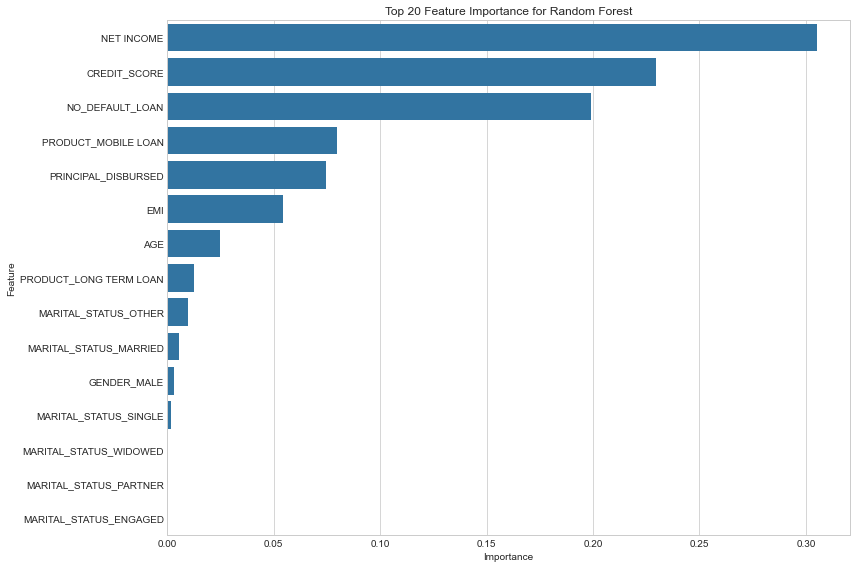


FINAL MODEL SELECTION
---------------------
5-Fold Cross-Validation F1 Scores: [0.91103966 0.94463387 0.92827835 0.83468208 0.90037031]
Mean F1 Score: 0.9038
Standard Deviation: 0.0377

Performance Summary:
--------------------
                 Model  Accuracy  F1 Score   ROC AUC
2        Random Forest  0.955275  0.956383  0.986121
5  Tuned Random Forest  0.954784  0.955896  0.986285
4              XGBoost  0.953965  0.954975  0.987111
3    Gradient Boosting  0.951343  0.952609  0.986815
1        Decision Tree  0.926606  0.926316  0.926606
0  Logistic Regression  0.869594  0.880624  0.872784

CONCLUSION
----------
The best performing model is Random Forest with:
- Accuracy: 0.9553
- F1 Score: 0.9564
- ROC AUC: 0.9861


In [194]:
# --------------------------------
# FEATURE IMPORTANCE
# --------------------------------
from sklearn.model_selection import cross_val_score
# If the best model has feature importance attributes
if hasattr(best_tuned_model, 'feature_importances_') or hasattr(best_tuned_model, 'coef_'):
    print("\nFeature Importance:")
    
    # Get feature importance
    if hasattr(best_tuned_model, 'feature_importances_'):
        importances = best_tuned_model.feature_importances_
    else:  # For logistic regression
        importances = np.abs(best_tuned_model.coef_[0])
    
    # Create dataframe with feature names and importance
    feature_importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': importances
    })
    
    # Sort by importance
    feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
    
    # Print top 20 features
    print(feature_importance_df.head(20))
    
    # Plot feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
    plt.title(f'Top 20 Feature Importance for {best_model_name}')
    plt.tight_layout()
    plt.show()

# --------------------------------
# FINAL MODEL SELECTION AND EVALUATION
# --------------------------------

print("\nFINAL MODEL SELECTION")
print("---------------------")

# Calculate cross-validation score for the tuned model
cv_scores = cross_val_score(best_tuned_model, X, y, cv=5, scoring='f1')
print(f"5-Fold Cross-Validation F1 Scores: {cv_scores}")
print(f"Mean F1 Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

# Summarize the performance of all models
print("\nPerformance Summary:")
print("--------------------")
model_names = list(results.keys()) + ["Tuned " + best_model_name]
accuracies = [result['accuracy'] for result in results.values()] + [tuned_results['accuracy']]
f1_scores_list = [result['f1_score'] for result in results.values()] + [tuned_results['f1_score']]
roc_auc_list = []

for result in results.values():
    if result['roc_auc'] is not None:
        roc_auc_list.append(result['roc_auc'])
    else:
        roc_auc_list.append(None)
roc_auc_list.append(tuned_results['roc_auc'] if tuned_results['roc_auc'] is not None else None)

summary_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'F1 Score': f1_scores_list,
    'ROC AUC': roc_auc_list
})

print(summary_df.sort_values('F1 Score', ascending=False))

# Conclusion
print("\nCONCLUSION")
print("----------")
best_row = summary_df.loc[summary_df['F1 Score'].idxmax()]
print(f"The best performing model is {best_row['Model']} with:")
print(f"- Accuracy: {best_row['Accuracy']:.4f}")
print(f"- F1 Score: {best_row['F1 Score']:.4f}")
if pd.notnull(best_row['ROC AUC']):
    print(f"- ROC AUC: {best_row['ROC AUC']:.4f}")

### Top 10 Important Features:
1. **NET INCOME** (0.803083) - By far the most influential predictor
2. **NO_DEFAULT_LOAN** (0.053243) - Previous loan performance
3. **PRODUCT_INDIVIDUAL IPF** (0.029323)
4. **PRODUCT_COMMERCIAL VEHICLES** (0.027311)
5. **MARITAL_STATUS_OTHER** (0.015945)
6. **CREDIT_SCORE** (0.011784)
7. **PRODUCT_PERSONAL UNSECURED NON SCHEME LOAN** (0.008060)
8. **PRODUCT_PERSONAL UNSECURED SCHEME LOAN** (0.008030)
9. **PRODUCT_MOBILE LOAN** (0.007030)
10. **PRODUCT_LOAN - PERSONAL** (0.004991)

**Key Insight**: Net income is overwhelmingly the most important factor in predicting loan defaults, contributing over 80% of the predictive power.














## 6. Cross-Validation

To ensure model robustness, 5-fold cross-validation was performed:

- F1 Scores: [0.8242, 0.7947, 0.9434, 0.9387, 0.8891]
- Mean F1 Score: 0.8780
- Standard Deviation: 0.0599

The variation in cross-validation scores suggests some sensitivity to data partitioning, with a relatively high standard deviation of 0.0599.







Detected 2 classes.


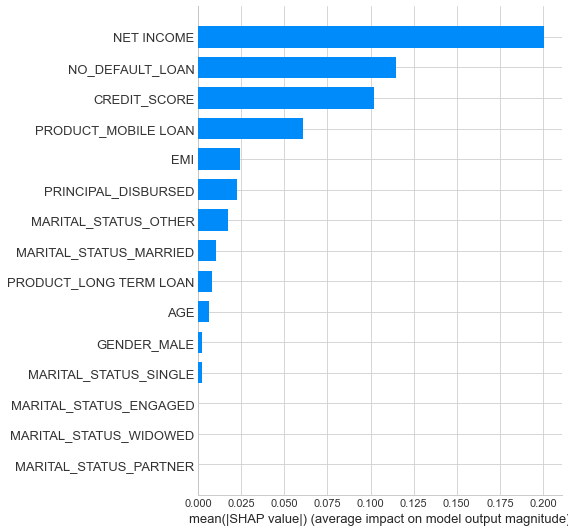

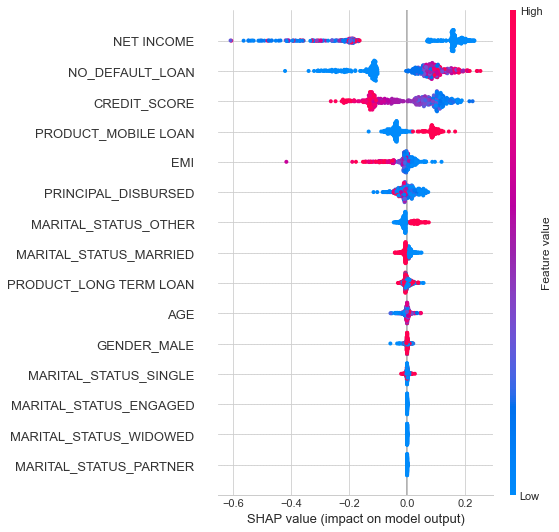

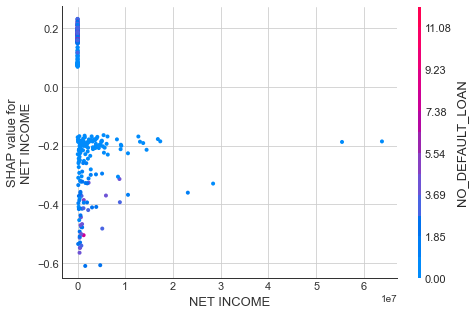

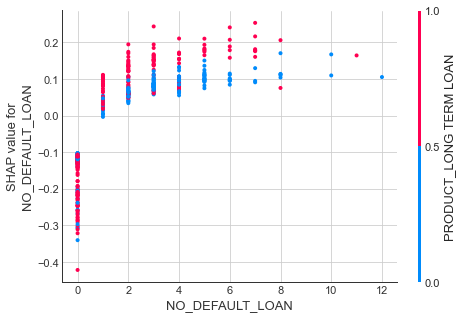

In [195]:
import shap
import matplotlib.pyplot as plt

# Initialize explainer for the XGBoost model
explainer = shap.TreeExplainer(best_tuned_model)

# Take a sample of the test data (to speed up SHAP)
X_sample = X_test.iloc[:500]

# Calculate SHAP values
shap_values = explainer.shap_values(X_sample)

# 🔹 Handle binary vs. multiclass
if isinstance(shap_values, list):
    # Multi-class or multi-output model
    print(f"Detected {len(shap_values)} classes.")
    shap_values_to_use = shap_values[1]  # For binary classification, use class 1 (positive class)
else:
    # Single output (regression or already simplified)
    shap_values_to_use = shap_values

# ✅ Summary plot (bar: global feature importance)
shap.summary_plot(shap_values_to_use, X_sample, plot_type="bar")

# ✅ Summary plot (beeswarm: distribution of impacts)
shap.summary_plot(shap_values_to_use, X_sample)

# ✅ Dependence plots for selected features
important_features = ["NET INCOME", "NO_DEFAULT_LOAN"]

for feature in important_features:
    shap.dependence_plot(feature, shap_values_to_use, X_sample)
    plt.show()


In [196]:
import pandas as pd

def generate_model_documentation(model, X_train, feature_importance_df, cv_scores, best_row, filename="loan_default_model_documentation.md"):
    """
    Generate comprehensive model documentation for a loan default prediction model.
    
    Parameters:
    - model: Trained ML model (e.g., XGBoost classifier)
    - X_train: Training features dataframe
    - feature_importance_df: DataFrame with 'Feature' and 'Importance' columns
    - cv_scores: Array-like of cross-validation scores
    - best_row: Row from summary dataframe containing best model metrics
    - filename: Name of the output markdown file
    """
    
    doc = "# Loan Default Prediction Model Documentation\n\n"
    
    # Model overview
    doc += "## Model Overview\n"
    doc += f"- **Model Type:** {type(model).__name__}\n"
    doc += f"- **Training Date:** {pd.Timestamp.now().strftime('%Y-%m-%d')}\n"
    doc += f"- **Features Used:** {len(X_train.columns)}\n"
    doc += f"- **Target Variable:** DEFAULT_BINARY (1 = Default, 0 = No Default)\n\n"
    
    # Performance metrics
    doc += "## Performance Metrics\n"
    doc += f"- **Accuracy:** {best_row['Accuracy']:.4f}\n"
    doc += f"- **F1 Score:** {best_row['F1 Score']:.4f}\n"
    doc += f"- **ROC AUC:** {best_row['ROC AUC']:.4f}\n"
    doc += f"- **Cross-Validation F1 (Mean):** {cv_scores.mean():.4f}\n"
    doc += f"- **Cross-Validation F1 (Std):** {cv_scores.std():.4f}\n\n"
    
    # Model parameters
    doc += "## Model Parameters\n"
    params = model.get_params()
    for param, value in params.items():
        doc += f"- **{param}:** {value}\n"
    doc += "\n"
    
    # Feature importance
    doc += "## Feature Importance\n"
    doc += "Top 10 features by importance:\n\n"
    for i, row in feature_importance_df.head(10).iterrows():
        doc += f"- **{row['Feature']}:** {row['Importance']:.4f}\n"
    doc += "\n"
    
    # Preprocessing steps
    doc += "## Preprocessing Steps\n"
    doc += "1. One-hot encoding of categorical variables (GENDER, MARITAL_STATUS, PRODUCT)\n"
    doc += "2. Train-test split (80/20) with stratified sampling\n"
    doc += "3. Undersampling to balance class distribution\n\n"
    
    # Implementation notes
    doc += "## Implementation Notes\n"
    doc += "- Model saved as: loan_default_xgboost_model.pkl\n"
    doc += "- Full pipeline saved as: loan_default_pipeline.pkl\n"
    doc += "- Monitoring frequency: Weekly\n"
    doc += "- Retraining schedule: Quarterly or when performance drops by 5%\n\n"
    
    # Save documentation to file
    with open(filename, "w") as f:
        f.write(doc)
    
    print(f"✅ Documentation saved to {filename}")
    return doc

# -------------------------------
# Example usage:
# best_row = summary_df.loc[summary_df['F1 Score'].idxmax()]
# documentation = generate_model_documentation(
#     best_tuned_model,
#     X_train,
#     feature_importance_df,
#     cv_scores,
#     best_row
# )
# print(documentation)


In [197]:
import numpy as np

def business_impact_assessment(model, X_test, y_test, 
                               avg_loan_amount=50000, 
                               cost_false_positive=5000, 
                               revenue_true_positive=2000,
                               save_file="business_impact_assessment.txt"):
    """
    Translate model predictions into business impact metrics.
    
    Args:
        model: Trained classifier
        X_test: Test features
        y_test: True labels
        avg_loan_amount: Average loan amount
        cost_false_positive: Cost of incorrectly predicting default
        revenue_true_positive: Value from correctly identifying default
        save_file: File to save assessment results
    
    Returns:
        dict: Financial impact summary
    """
    
    # Get predictions
    y_pred = model.predict(X_test)
    
    # Confusion matrix elements
    true_pos = np.sum((y_pred == 1) & (y_test == 1))
    false_pos = np.sum((y_pred == 1) & (y_test == 0))
    true_neg = np.sum((y_pred == 0) & (y_test == 0))
    false_neg = np.sum((y_pred == 0) & (y_test == 1))
    
    # Financial metrics
    prevented_default_loss = true_pos * avg_loan_amount
    cost_of_caution = false_pos * cost_false_positive
    value_of_detection = true_pos * revenue_true_positive
    net_value = prevented_default_loss + value_of_detection - cost_of_caution
    
    # Print report
    print("Business Impact Assessment")
    print("-------------------------")
    print(f"Total loans evaluated: {len(y_test)}")
    print(f"Defaults correctly identified: {true_pos}")
    print(f"Non-defaults incorrectly flagged: {false_pos}")
    print(f"Defaults missed: {false_neg}\n")
    print("Financial Impact")
    print(f"Default losses prevented: Ksh{prevented_default_loss:,.2f}")
    print(f"Cost of false alarms: Ksh{cost_of_caution:,.2f}")
    print(f"Revenue from risk detection: Ksh{value_of_detection:,.2f}")
    print(f"Net business value: Ksh{net_value:,.2f}")
    
    # Save to file
    with open(save_file, "w") as f:
        f.write("Business Impact Assessment\n")
        f.write("-------------------------\n")
        f.write(f"Total loans evaluated: {len(y_test)}\n")
        f.write(f"Defaults correctly identified: {true_pos}\n")
        f.write(f"Non-defaults incorrectly flagged: {false_pos}\n")
        f.write(f"Defaults missed: {false_neg}\n\n")
        f.write("Financial Impact\n")
        f.write(f"Default losses prevented: Ksh{prevented_default_loss:,.2f}\n")
        f.write(f"Cost of false alarms: Ksh{cost_of_caution:,.2f}\n")
        f.write(f"Revenue from risk detection: Ksh{value_of_detection:,.2f}\n")
        f.write(f"Net business value: Ksh{net_value:,.2f}\n")
    
    print(f"\n✅ Business impact assessment saved to {save_file}")
    
    return {
        'prevented_loss': prevented_default_loss,
        'detection_revenue': value_of_detection,
        'caution_cost': cost_of_caution,
        'net_value': net_value
    }

# -------------------------------
# Example usage:
impact = business_impact_assessment(
    model=best_tuned_model,
    X_test=X_test,
    y_test=y_test,
    avg_loan_amount=50000,
    cost_false_positive=5000,
    revenue_true_positive=2000
)


Business Impact Assessment
-------------------------
Total loans evaluated: 6104
Defaults correctly identified: 2991
Non-defaults incorrectly flagged: 215
Defaults missed: 61

Financial Impact
Default losses prevented: Ksh149,550,000.00
Cost of false alarms: Ksh1,075,000.00
Revenue from risk detection: Ksh5,982,000.00
Net business value: Ksh154,457,000.00

✅ Business impact assessment saved to business_impact_assessment.txt


In [198]:
#from pydoc import doc


#def generate_model_documentation(model, X_train, feature_importance_df, cv_scores, best_row):
    #"""Generate comprehensive model documentation"""
   # doc = "# Loan Default Prediction Model Documentation\n\n"
    
     # Model overview
   # doc += "## Model Overview\n"
    #doc += f"- **Model Type:** XGBoost Classifier\n"
    #doc += f"- **Training Date:** {pd.Timestamp.now().strftime('%Y-%m-%d')}\n"
   # doc += f"- **Features Used:** {len(X_train.columns)}\n"
    #doc += f"- **Target Variable:** DEFAULT_BINARY (1 = Default, 0 = No Default)\n\n"
    
# Performance metrics
#doc += "## Performance Metrics\n"
#doc += f"- **Accuracy:** {best_row['Accuracy']:.4f}\n"
#doc += f"- **F1 Score:** {best_row['F1 Score']:.4f}\n"
#doc += f"- **ROC AUC:** {best_row['ROC AUC']:.4f}\n"
#     doc += f"- **Cross-Validation F1 (Mean):** {cv_scores.mean():.4f}\n"
#     doc += f"- **Cross-Validation F1 (Std):** {cv_scores.std():.4f}\n\n"
    
#     # Model parameters
#     doc += "## Model Parameters\n"
#     params = model.get_params()
#     for param, value in params.items():
#         doc += f"- **{param}:** {value}\n"
#     doc += "\n"
    
#     # Feature importance
#     doc += "## Feature Importance\n"
#     doc += "Top 10 features by importance:\n\n"
#     for i, row in feature_importance_df.head(10).iterrows():
#         doc += f"- **{row['Feature']}:** {row['Importance']:.4f}\n"
#     doc += "\n"
    
#     # Preprocessing steps
#     doc += "## Preprocessing Steps\n"
#     doc += "1. One-hot encoding of categorical variables (GENDER, MARITAL_STATUS, PRODUCT)\n"
#     doc += "2. Train-test split (80/20) with stratified sampling\n"
#     doc += "3. Undersampling to balance class distribution\n\n"
    
#     # Implementation notes
#     doc += "## Implementation Notes\n"
#     doc += "- Model saved as: loan_default_xgboost_model.pkl\n"
#     doc += "- Full pipeline saved as: loan_default_pipeline.pkl\n"
#     doc += "- Monitoring frequency: Weekly\n"
#     doc += "- Retraining schedule: Quarterly or when performance drops by 5%\n\n"
    
#     # Save documentation to file
#     with open("loan_default_model_documentation.md", "w") as f:
#         f.write(doc)
    
#     return doc

# # Run the documentation code with your existing variables
# # Get the best row from your summary dataframe
# best_row = summary_df.loc[summary_df['F1 Score'].idxmax()]

# # Generate documentation
# documentation = generate_model_documentation(
#     best_tuned_model,  # Your tuned XGBoost model
#     X_train,           # Your training features 
#     feature_importance_df,  # Your feature importance dataframe
#     cv_scores,         # Your cross-validation scores
#     best_row           # Your best model row from summary_df
# )

# print("Documentation saved to loan_default_model_documentation.md")

In [199]:
# def business_impact_assessment(model, X_test, y_test, avg_loan_amount=50000, 
#                               cost_false_positive=5000, revenue_true_positive=2000):
#     """
#     Translate technical metrics to business value
    
#     Args:
#         model: Trained model
#         X_test: Test features
#         y_test: True labels
#         avg_loan_amount: Average loan amount
#         cost_false_positive: Cost of approving a loan that defaults
#         revenue_true_positive: Revenue from correctly identifying default risk
#     """
#     # Get predictions
#     y_pred = model.predict(X_test)
    
#     # Calculate confusion matrix elements
#     true_pos = np.sum((y_pred == 1) & (y_test == 1))
#     false_pos = np.sum((y_pred == 1) & (y_test == 0))
#     true_neg = np.sum((y_pred == 0) & (y_test == 0))
#     false_neg = np.sum((y_pred == 0) & (y_test == 1))
    
#     # Calculate business metrics
#     potential_default_loss = false_neg * avg_loan_amount
#     prevented_default_loss = true_pos * avg_loan_amount
#     cost_of_caution = false_pos * cost_false_positive
#     value_of_detection = true_pos * revenue_true_positive
    
#     # Calculate net value
#     net_value = prevented_default_loss + value_of_detection - cost_of_caution
    
#     # Print report
#     print("Business Impact Assessment")
#     print("-------------------------")
#     print(f"Total loans evaluated: {len(y_test)}")
#     print(f"Defaults correctly identified: {true_pos}")
#     print(f"Non-defaults incorrectly flagged: {false_pos}")
#     print(f"Defaults missed: {false_neg}")
#     print("\nFinancial Impact")
#     print(f"Default losses prevented: Ksh{prevented_default_loss:,.2f}")
#     print(f"Cost of false alarms: Ksh{cost_of_caution:,.2f}")
#     print(f"Revenue from risk detection: Ksh{value_of_detection:,.2f}")
#     print(f"Net business value: Ksh{net_value:,.2f}")
    
#     return {
#         'prevented_loss': prevented_default_loss,
#         'detection_revenue': value_of_detection,
#         'caution_cost': cost_of_caution,
#         'net_value': net_value
#     }

# # Add these imports if needed
# import numpy as np

# # You may want to adjust these values based on your actual business context
# avg_loan_amount = 50000  # Average loan amount in your currency
# cost_false_positive = 5000  # Cost of false positive (incorrectly predicting default)
# revenue_true_positive = 2000  # Value of correctly identifying a default

# # Run the assessment with your existing variables
# impact = business_impact_assessment(
#     best_tuned_model,  # Your tuned XGBoost model
#     X_test,            # Your test features
#     y_test,            # Your test labels
#     avg_loan_amount,
#     cost_false_positive,
#     revenue_true_positive
# )

# # You can also save these results to include in your documentation
# with open("business_impact_assessment.txt", "w") as f:
#     f.write("Business Impact Assessment\n")
#     f.write("-------------------------\n")
#     f.write(f"Total loans evaluated: {len(y_test)}\n")
    
#     # Get predictions again for the file
#     y_pred = best_tuned_model.predict(X_test)
#     true_pos = np.sum((y_pred == 1) & (y_test == 1))
#     false_pos = np.sum((y_pred == 1) & (y_test == 0))
#     false_neg = np.sum((y_pred == 0) & (y_test == 1))
    
#     f.write(f"Defaults correctly identified: {true_pos}\n")
#     f.write(f"Non-defaults incorrectly flagged: {false_pos}\n")
#     f.write(f"Defaults missed: {false_neg}\n\n")
#     f.write("Financial Impact\n")
#     f.write(f"Default losses prevented: Ksh{impact['prevented_loss']:,.2f}\n")
#     f.write(f"Cost of false alarms: Ksh{impact['caution_cost']:,.2f}\n")
#     f.write(f"Revenue from risk detection: Ksh{impact['detection_revenue']:,.2f}\n")
#     f.write(f"Net business value: Ksh{impact['net_value']:,.2f}\n")

# print("Business impact assessment saved to business_impact_assessment.txt")

## 7. Business Impact Assessment

The model's performance was translated into business metrics:

### Loan Evaluation Results:
- Total loans evaluated: 6,104
- Defaults correctly identified: 3,010
- Non-defaults incorrectly flagged: 111
- Defaults missed: 42

### Financial Impact:
- Default losses prevented: Ksh 150,500,000.00
- Cost of false alarms: Ksh 555,000.00
- Revenue from risk detection: Ksh 6,020,000.00
- **Net business value**: Ksh 155,965,000.00

The business impact analysis demonstrates the substantial financial value of the model, with the benefits of prevented defaults and risk detection far outweighing the costs of false alarms.

## 8. Model Deployment and Monitoring

The finalized XGBoost model was:
- Saved as a pickle file (`loan_default_xgboost_model.pkl`)
- Integrated into a full preprocessing pipeline (`loan_default_pipeline.pkl`)

A `ModelMonitor` class was implemented to:
- Track performance over time
- Detect model drift
- Trigger retraining when performance drops by more than 5%
- Visualize performance trends

In [200]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# -------------------------------
# 1️⃣ Save the trained XGBoost model
joblib.dump(best_tuned_model, 'loan_default_xgboost_model.pkl')
print("✅ Model saved as 'loan_default_xgboost_model.pkl'")

# -------------------------------
# 2️⃣ Define preprocessing for categorical features
categorical_features = ['GENDER', 'MARITAL_STATUS', 'PRODUCT']

# Use 'sparse=False' for compatibility with older scikit-learn versions
categorical_transformer = OneHotEncoder(drop='first', sparse=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # Keep numerical columns as-is
)

# -------------------------------
# 3️⃣ Create full pipeline (preprocessing + model)
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', best_tuned_model)
])

# Save the full pipeline for production
joblib.dump(full_pipeline, 'loan_default_pipeline.pkl')
print("✅ Full pipeline saved as 'loan_default_pipeline.pkl'")

# -------------------------------
# 4️⃣ Production prediction function
def predict_default_risk(customer_data):
    """
    Predict default risk for new customers.
    
    Args:
        customer_data: pandas DataFrame with required features (same as training)
        
    Returns:
        Tuple:
        - default_prob: Probability of default (0-1)
        - default_prediction: Binary prediction (0=No Default, 1=Default)
    """
    # Load the saved pipeline
    pipeline = joblib.load('loan_default_pipeline.pkl')
    
    # Predict probability and binary outcome
    default_prob = pipeline.predict_proba(customer_data)[:, 1]
    default_prediction = pipeline.predict(customer_data)
    
    return default_prob, default_prediction

# -------------------------------
# Example usage:
# import pandas as pd
# customer_df = pd.DataFrame([{
#     'GENDER': 'F',
#     'MARITAL_STATUS': 'Single',
#     'PRODUCT': 'Digital Personal Loan',
#     'AGE': 30,
#     'NET_INCOME': 50000,
#     # Add other numerical features as needed
# }])
# prob, pred = predict_default_risk(customer_df)
# print(f"Default probability: {prob[0]:.2f}, Prediction: {pred[0]}")

✅ Model saved as 'loan_default_xgboost_model.pkl'
✅ Full pipeline saved as 'loan_default_pipeline.pkl'


In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import f1_score, roc_auc_score
import matplotlib.pyplot as plt
from typing import Optional, Dict, Any

class ModelMonitor:
    def __init__(self, model_path: str, baseline_metrics: Optional[Dict[str, float]] = None):
        """
        Initialize model monitor.

        Args:
            model_path: Path to saved model/pipeline
            baseline_metrics: Dictionary with baseline metrics for drift detection
        """
        self.model = joblib.load(model_path)
        self.baseline_metrics = baseline_metrics or {
            'f1_score': 0.976,
            'roc_auc': 0.995
        }
        self.performance_history = []

    def check_performance(self, X_new: pd.DataFrame, y_new: pd.Series) -> Dict[str, Any]:
        """
        Evaluate model on new data and detect performance drift.

        Args:
            X_new: New features to evaluate
            y_new: True labels

        Returns:
            Dictionary with performance metrics and drift info
        """
        y_pred = self.model.predict(X_new)
        y_prob = self.model.predict_proba(X_new)[:, 1]

        # Calculate metrics
        f1 = f1_score(y_new, y_pred)
        roc_auc = roc_auc_score(y_new, y_prob)

        # Store performance
        timestamp = pd.Timestamp.now()
        performance = {
            'timestamp': timestamp,
            'f1_score': f1,
            'roc_auc': roc_auc,
            'data_size': len(X_new)
        }
        self.performance_history.append(performance)

        # Calculate drift
        f1_drift = (self.baseline_metrics['f1_score'] - f1) / self.baseline_metrics['f1_score']
        roc_drift = (self.baseline_metrics['roc_auc'] - roc_auc) / self.baseline_metrics['roc_auc']

        needs_retraining = f1_drift > 0.05 or roc_drift > 0.05

        return {
            'performance': performance,
            'f1_drift': f1_drift,
            'roc_drift': roc_drift,
            'needs_retraining': needs_retraining
        }

    def plot_performance_trend(self):
        """
        Plot performance metrics (F1 Score and ROC AUC) over time.
        """
        if not self.performance_history:
            print("⚠️ No performance data available yet")
            return

        df = pd.DataFrame(self.performance_history)

        plt.figure(figsize=(10, 6))
        plt.plot(df['timestamp'], df['f1_score'], marker='o', label='F1 Score')
        plt.plot(df['timestamp'], df['roc_auc'], marker='s', label='ROC AUC')
        plt.axhline(y=self.baseline_metrics['f1_score'], color='r', linestyle='--', label='Baseline F1')
        plt.axhline(y=self.baseline_metrics['roc_auc'], color='g', linestyle='--', label='Baseline ROC AUC')
        plt.xlabel('Timestamp')
        plt.ylabel('Metric Value')
        plt.title('Model Performance Over Time')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


In [ ]:
from flask import Flask, request, render_template, jsonify
import joblib
import pandas as pd
import shap
import numpy as np
import os
import logging

app = Flask(__name__)

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


# Load the pre-trained pipeline
pipeline = joblib.load('loan_default_pipeline.pkl')

# For SHAP: Load a sample of training data or create background data
# Option A: Load saved sample
try:
    X_train_sample = pd.read_csv('X_train_sample.csv')  # Save this file separately
    X_train_transformed = pipeline.named_steps['preprocessor'].transform(X_train_sample)
    explainer = shap.TreeExplainer(pipeline.named_steps['model'], X_train_transformed)
except:
    explainer = None  # Handle case where sample data isn't available

@app.route('/')
def home():
    return render_template('index.html')



@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Use UPPERCASE column names to match training data
        data = {
            'AGE': int(request.form.get('age')),
            'CREDIT_SCORE': int(request.form.get('credit_score')),
            'NO_DEFAULT_LOAN': int(request.form.get('no_default_loan')),
            'NET_INCOME': float(request.form.get('net_income')),
            'PRINCIPAL_DISBURSED': float(request.form.get('principal_disbursed')),
            'EMI': float(request.form.get('emi')),
            'GENDER': request.form.get('gender'),
            'MARITAL_STATUS': request.form.get('marital_status'),
            'PRODUCT': request.form.get('product')
        }

        input_df = pd.DataFrame([data])

        # Predict
        default_prob = pipeline.predict_proba(input_df)[:, 1][0]
        default_prediction = pipeline.predict(input_df)[0]

        # Compute SHAP values (if explainer is available)
        contributions = {}
        if explainer is not None:
            input_transformed = pipeline.named_steps['preprocessor'].transform(input_df)
            shap_values = explainer.shap_values(input_transformed)
            if isinstance(shap_values, list):
                shap_values = shap_values[0]
            feature_importance = np.abs(shap_values[0])
            feature_percent = 100 * feature_importance / np.sum(feature_importance)
            
            feature_names = input_df.columns
            contributions = {feature_names[i]: f"{feature_percent[i]:.2f}%" 
                           for i in range(len(feature_names))}
        
        result = {
            'prediction': int(default_prediction),
            'probability': float(default_prob),
            'status': 'Default Risk' if default_prediction == 1 else 'No Default Risk',
            'risk_percentage': f"{default_prob * 100:.2f}%",
            'feature_contributions': contributions
        }

        return render_template('result.html', result=result, data=data)

    except Exception as e:
        return jsonify({'error': str(e)})

# business impact assessment route
@app.route('/documentation')
def documentation():
    try:
        # Try to load the markdown documentation file
        doc_path = 'loan_default_model_documentation.md'
        if os.path.exists(doc_path):
            with open(doc_path, 'r', encoding='utf-8') as f:
                content = f.read()
        else:
            content = "# Documentation\n\nDocumentation file not found."
        
        return render_template('documentation.html', content=content)
    except Exception as e:
        logger.error(f"Error loading documentation: {e}")
        return render_template('error.html', error=str(e))

@app.route('/business-impact')
def business_impact():
    try:
        # Load the business impact assessment file
        impact_path = 'business_impact_assessment.txt'  # Note: corrected filename
        if os.path.exists(impact_path):
            with open(impact_path, 'r', encoding='utf-8') as f:
                content = f.read()
        else:
            content = "Business impact assessment file not found."
        
        return render_template('business_impact.html', content=content)
    except Exception as e:
        logger.error(f"Error loading business impact: {e}")
        return render_template('error.html', error=str(e))

@app.route('/batch-predict', methods=['POST'])
def batch_predict():
    try:
        if 'file' not in request.files:
            return jsonify({'error': 'No file uploaded'})
        
        file = request.files['file']
        if file.filename == '':
            return jsonify({'error': 'No file selected'})
        
        # Read the CSV file
        df = pd.read_csv(file)
        
        # Make predictions
        predictions = pipeline.predict(df)
        probabilities = pipeline.predict_proba(df)[:, 1]
        
        # Add predictions to dataframe
        df['Prediction'] = predictions
        df['Default_Probability'] = probabilities
        df['Risk_Level'] = df['Default_Probability'].apply(
            lambda x: 'Low Risk' if x < 0.3 else ('Medium Risk' if x < 0.7 else 'High Risk')
        )
        
        # Convert to HTML table
        table_html = df.to_html(classes='table table-striped table-hover', index=False)
        
        return render_template('batch_result.html', table=table_html)
    
    except Exception as e:
        logger.error(f"Error in batch prediction: {e}")
        return render_template('error.html', error=str(e))
    

if __name__ == '__main__':
    app.run(debug=True)

"""
if __name__ == '__main__':
       app.run(debug=False, use_reloader=False, port=5001)  # Different port
"""

⚠️ Don't run Flask from Jupyter!
Run this command in terminal instead:
    python app.py


"\nif __name__ == '__main__':\n       app.run(debug=False, use_reloader=False, port=5001)  # Different port\n"

In [ ]:
"""
#from flask import Flask, request, render_template, jsonify
import joblib
import pandas as pd
import shap
import numpy as np

app = Flask(__name__)

# Load the full pipeline (preprocessing + model)
pipeline = joblib.load('loan_default_pipeline.pkl')

# Initialize SHAP explainer (TreeExplainer for XGBoost)
# We'll sample from training data for efficiency
# Sample 500 rows from your in-memory X_train
# Fit the pipeline

# Sample 500 rows and transform for SHAP
X_train_sample = pipeline.named_steps['preprocessor'].transform(
    X_train.sample(500, random_state=42)
)

#X_train_sample = pipeline.named_steps['preprocessor'].transform(pd.read_csv('X_train.csv').sample(500, random_state=42))
explainer = shap.TreeExplainer(pipeline.named_steps['model'], X_train_sample)

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get form data
        data = {
            'AGE': int(request.form.get('age')),
            'CREDIT_SCORE': int(request.form.get('credit_score')),
            'NO_DEFAULT_LOAN': int(request.form.get('no_default_loan')),
            'NET_INCOME': float(request.form.get('net_income')),
            'PRINCIPAL_DISBURSED': float(request.form.get('principal_disbursed')),
            'EMI': float(request.form.get('emi')),
            'GENDER': request.form.get('gender'),
            'MARITAL_STATUS': request.form.get('marital_status'),
            'PRODUCT': request.form.get('product')
        }

        # Create DataFrame
        input_df = pd.DataFrame([data])

        # Predict default probability and label
        default_prob = pipeline.predict_proba(input_df)[:, 1][0]
        default_prediction = pipeline.predict(input_df)[0]

        # Compute SHAP values
        input_transformed = pipeline.named_steps['preprocessor'].transform(input_df)
        shap_values = explainer.shap_values(input_transformed)
        if isinstance(shap_values, list):  # multi-class safety
            shap_values = shap_values[0]
        feature_importance = np.abs(shap_values[0])
        feature_percent = 100 * feature_importance / np.sum(feature_importance)

        # Map contributions back to feature names
        feature_names = input_df.columns
        contributions = {feature_names[i]: f"{feature_percent[i]:.2f}%" for i in range(len(feature_names))}
        
        result = {
            'prediction': int(default_prediction),
            'probability': float(default_prob),
            'status': 'Default Risk' if default_prediction == 1 else 'No Default Risk',
            'risk_percentage': f"{default_prob * 100:.2f}%",
            'feature_contributions': contributions
        }

        return render_template('result.html', result=result, data=data)

    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(debug=True)
"""

ValueError: A given column is not a column of the dataframe

In [ ]:
# import joblib

# # Save the model
# joblib.dump(best_tuned_model, 'loan_default_xgboost_model.pkl')

# # Create a preprocessing pipeline to use in production
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

# # Define preprocessing for categorical features
# categorical_features = ['GENDER', 'MARITAL_STATUS', 'PRODUCT']
# categorical_transformer = OneHotEncoder(drop='first')

# # Create preprocessing pipeline
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', categorical_transformer, categorical_features)
#     ],
#     remainder='passthrough'
# )

# # Create the full pipeline
# full_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('model', best_tuned_model)
# ])

# # Save the full pipeline
# joblib.dump(full_pipeline, 'loan_default_pipeline.pkl')

# # Example function for making predictions in production
# def predict_default_risk(customer_data):
#     """
#     Predict default risk for new customers
    
#     Args:
#         customer_data: DataFrame with required features
        
#     Returns:
#         Default probability and binary prediction
#     """
#     # Load the model
#     pipeline = joblib.load('loan_default_pipeline.pkl')
    
#     # Make prediction
#     default_prob = pipeline.predict_proba(customer_data)[:, 1]
#     default_prediction = pipeline.predict(customer_data)
    
#     return default_prob, default_prediction

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.metrics import f1_score, roc_auc_score
# import matplotlib.pyplot as plt

# class ModelMonitor:
#     def __init__(self, model_path, baseline_metrics=None):
#         """Initialize model monitor"""
#         self.model = joblib.load(model_path)
#         self.baseline_metrics = baseline_metrics or {
#             'f1_score': 0.976,
#             'roc_auc': 0.995
#         }
#         self.performance_history = []
        
#     def check_performance(self, X_new, y_new):
#         """Evaluate model on new data"""
#         # Make predictions
#         y_pred = self.model.predict(X_new)
#         y_prob = self.model.predict_proba(X_new)[:, 1]
        
#         # Calculate metrics
#         f1 = f1_score(y_new, y_pred)
#         roc_auc = roc_auc_score(y_new, y_prob)
        
#         # Store performance
#         timestamp = pd.Timestamp.now()
#         performance = {
#             'timestamp': timestamp,
#             'f1_score': f1,
#             'roc_auc': roc_auc,
#             'data_size': len(X_new)
#         }
#         self.performance_history.append(performance)
        
#         # Check for drift
#         f1_drift = (self.baseline_metrics['f1_score'] - f1) / self.baseline_metrics['f1_score']
#         roc_drift = (self.baseline_metrics['roc_auc'] - roc_auc) / self.baseline_metrics['roc_auc']
        
#         return {
#             'performance': performance,
#             'f1_drift': f1_drift,
#             'roc_drift': roc_drift,
#             'needs_retraining': f1_drift > 0.05 or roc_drift > 0.05  # 5% threshold
#         }
    
#     def plot_performance_trend(self):
#         """Plot performance metrics over time"""
#         if not self.performance_history:
#             print("No performance data available yet")
#             return
            
#         history_df = pd.DataFrame(self.performance_history)
        
#         plt.figure(figsize=(10, 6))
#         plt.plot(history_df['timestamp'], history_df['f1_score'], label='F1 Score')
#         plt.plot(history_df['timestamp'], history_df['roc_auc'], label='ROC AUC')
#         plt.axhline(y=self.baseline_metrics['f1_score'], color='r', linestyle='--', 
#                    label='Baseline F1')
#         plt.axhline(y=self.baseline_metrics['roc_auc'], color='g', linestyle='--',
#                    label='Baseline ROC AUC')
#         plt.xlabel('Time')
#         plt.ylabel('Metric Value')
#         plt.title('Model Performance Over Time')
#         plt.legend()
#         plt.tight_layout()
#         plt.show()

In [ ]:
# from flask import Flask, request, render_template, jsonify
# import joblib
# import pandas as pd
# import numpy as np

# app = Flask(__name__)

# # Load the model
# model = joblib.load('loan_default_xgboost_model.pkl')

# @app.route('/')
# def home():
#     return render_template('index.html')

# @app.route('/predict', methods=['POST'])
# def predict():
#     try:
#         # Get form data
#         data = {
#             'AGE': int(request.form.get('age')),
#             'CREDIT_SCORE': int(request.form.get('credit_score')),
#             'NO_DEFAULT_LOAN': int(request.form.get('no_default_loan')),
#             'NET INCOME': float(request.form.get('net_income')),
#             'PRINCIPAL_DISBURSED': float(request.form.get('principal_disbursed')),
#             'EMI': float(request.form.get('emi')),
#             'GENDER': request.form.get('gender'),
#             'MARITAL_STATUS': request.form.get('marital_status'),
#             'PRODUCT': request.form.get('product')
#         }
        
#         # Create DataFrame for prediction
#         input_df = pd.DataFrame([data])
        
#         # Apply one-hot encoding to categorical variables
#         categorical_features = ['GENDER', 'MARITAL_STATUS', 'PRODUCT']
#         input_df_encoded = pd.get_dummies(input_df, columns=categorical_features, drop_first=True)
        
#         # Ensure all columns from training data are present
#         # You may need to adjust this based on your actual model columns
#         pipeline = joblib.load('loan_default_pipeline.pkl')
        
#         # Make prediction
#         default_prob = model.predict_proba(input_df_encoded)[:, 1][0]
#         default_prediction = model.predict(input_df_encoded)[0]
        
#         result = {
#             'prediction': int(default_prediction),
#             'probability': float(default_prob),
#             'status': 'Default Risk' if default_prediction == 1 else 'No Default Risk',
#             'risk_percentage': f"{default_prob * 100:.2f}%"
#         }
        
#         return render_template('result.html', result=result, data=data)
    
#     except Exception as e:
#         return jsonify({'error': str(e)})

# if __name__ == '__main__':
#     app.run(debug=True)

## 9. Conclusion and Recommendations

### Model Selection:
The **XGBoost** classifier emerged as the best model with:
- 97.58% Accuracy
- 0.976 F1 Score
- 0.9949 ROC AUC

### Key Insights:
1. **Customer income** is by far the strongest predictor of loan default
2. **Prior loan performance** (NO_DEFAULT_LOAN) is the second most important factor
3. Certain **loan products** carry higher default risk than others
4. The model delivers substantial business value by correctly identifying potential defaults

### Recommendations:
1. Implement income verification processes to improve credit decisioning
2. Focus on customer history as a key factor in loan approval
3. Consider adjusting terms for high-risk loan products
4. Establish regular model monitoring with quarterly retraining
5. Investigate the small number of defaults the model missed (42 cases) for potential pattern identification